Implementing K-Means Clustering

Task: Apply K-Means clustering to the Iris dataset and visualize the clusters using a scatter plot of two features.

 Evaluate the clustering by comparing it to the actual species labels.


In [350]:
import pandas as pd
df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [351]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [352]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species']= encoder.fit_transform(df['species'])

In [353]:
X=df[['sepal_length', 'sepal_width']]
y= df['species'].values

In [354]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
standardized_features=scaler.fit_transform(X)


In [355]:
df = df.astype(int)


In [356]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train= train_test_split(standardized_features,y,random_state=42, test_size=0.2)

In [357]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0)
kmean.fit(standardized_features)
identified_clusters = kmean.predict(standardized_features)

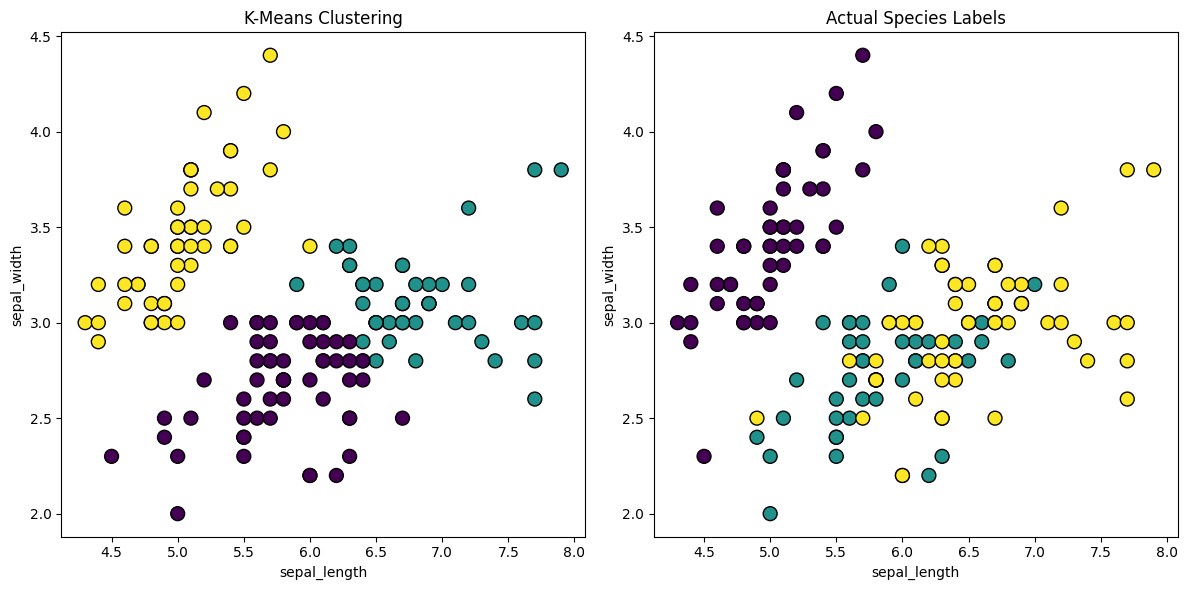

In [358]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['sepal_length'], X['sepal_width'], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X['sepal_length'], X['sepal_width'], c=y, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Actual Species Labels')

plt.tight_layout()
plt.show()


Task: Use the Elbow Method and Silhouette Score to determine the optimal number of clusters for the Iris dataset. 

Visualize the Silhouette Score for different cluster counts.


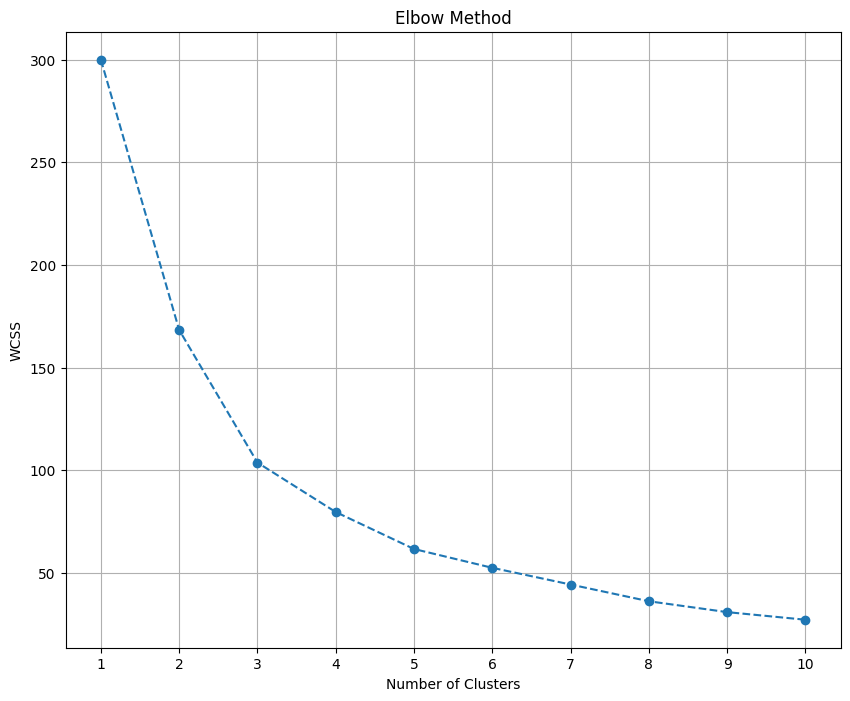

In [359]:
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmean.fit(standardized_features)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

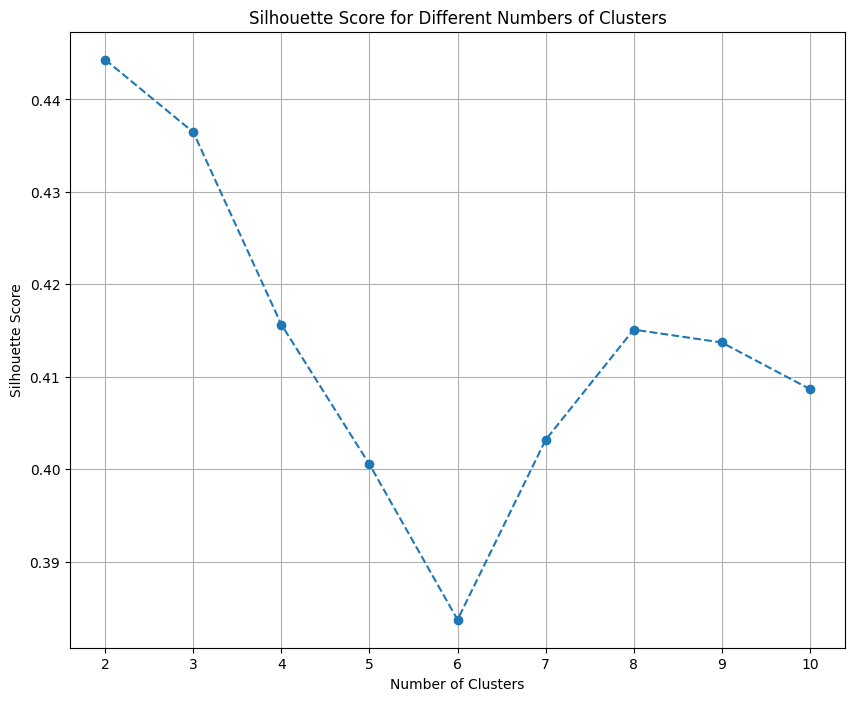

In [360]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmean = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmean.fit(standardized_features)
    labels = kmean.labels_
    score = silhouette_score(standardized_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


Cluster Visualization with PCA

Task: Use Principal Component Analysis (PCA) to reduce the Iris dataset to two dimensions.

 Visualize the clusters obtained from K-Means clustering in the PCA-reduced space.


In [361]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
standardized_pca = pca.fit_transform(standardized_features)

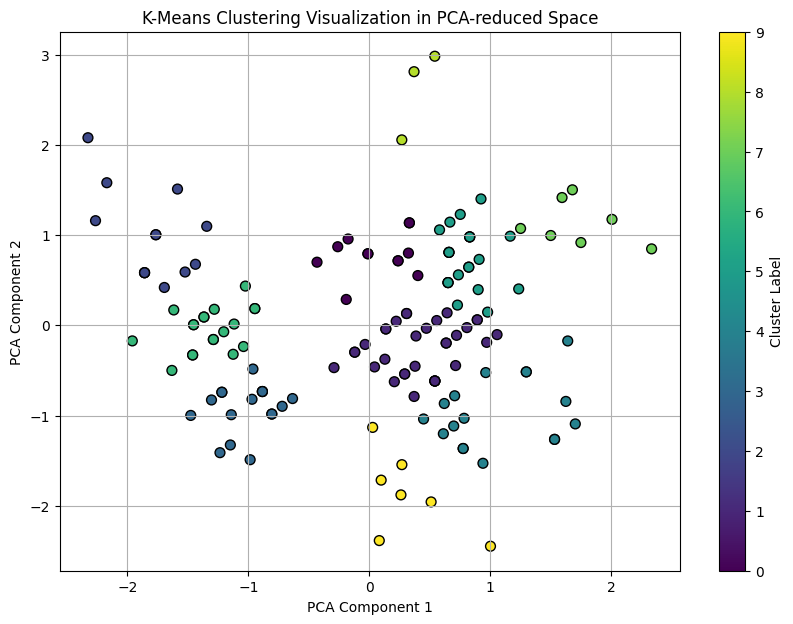

In [362]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(standardized_pca[:, 0], standardized_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization in PCA-reduced Space')
plt.grid(True)
plt.show()

Hierarchical Clustering: Dendrogram

Task: Implement hierarchical clustering using the Iris dataset.

 Plot a dendrogram to visualize the clustering process and choose an appropriate number of clusters.


In [363]:
from scipy.cluster.hierarchy import dendrogram, linkage

hier_cl = linkage(standardized_features, method='complete') 


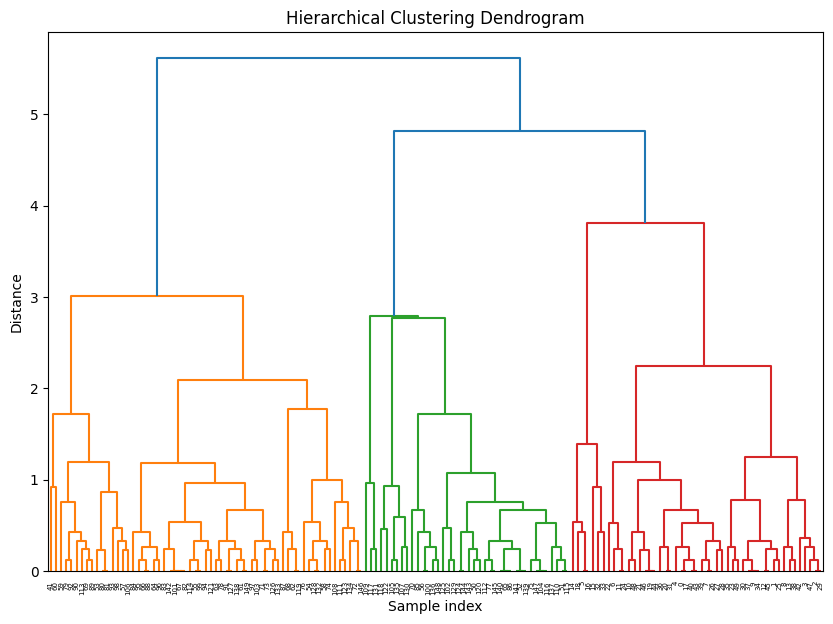

In [364]:
plt.figure(figsize=(10, 7))
dendrogram(hier_cl, orientation='top')


plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Comparing Clustering Algorithms

Task: Compare the performance of K-Means and Agglomerative Hierarchical Clustering on the Iris dataset.

Discuss the strengths and weaknesses of each approach based on the results.
